<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/6/68/Animation_portail_musique.gif" alt="Piano gif from Wikipedia" />
</p>

# PyWavelets and Jingle Bells

Part 1 for working with audio signals

---

## Overview
This notebook will generate a wavelet scalogram to determine the order of notes in a short .wav file. You'll learn how to generate a Wavelet Power spectrum graph

1. Prerequisites
2. Background
3. PyWavelets Overview
4. Wavelet Power Spectrum

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Matplotlib](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Necessary | Plotting on a data |
| [Intro to Pandas](https://foundations.projectpythia.org/core/pandas/pandas.html) | Necessary | Familiarity with working with dataframes |
| [Intro to Numpy](https://foundations.projectpythia.org/core/numpy/numpy-basics.html)| Necessary | Familiarity with working with arrays |
| [Intro to SciPy](https://docs.scipy.org/doc/scipy-1.13.1/tutorial/fft.html) | Helpful | Familiarity with working with .wav files |

- **Time to learn**: 20 minutes

---

## Background

Wavelet analysis is accomplished in Python via external package. [PyWavelets](https://pywavelets.readthedocs.io/en/latest/ref/cwt.html#pywt.cwt) is an open source Python package for wavelet analysis

```
pip install PyWavelets
```

## Imports

In [11]:
import numpy as np                          # working with arrays
import pandas as pd                         # working with dataframes
from scipy.io import wavfile                # loading in wav files
import matplotlib.pyplot as plt             # plot data

import pywt                                 # PyWavelets

## PyWavelets Overview

```
coeffs, freqs = pywt.cwt(data, scales, wavelet, sampling_period)
```

### Input Values
- data: input data as a array_like
- scales: array_like collection of the scales to use (np.arange(s0, jtot, dj))
- wavelet: name of Mother wavelet
- sampling_period: optional sampling period for frequencies output

### Return Values
- coefs: array_like collection of complex number output for wavelet coefficients
- freqs: array_like collection of frequencies

### Choosing a Scale
### Scales vs. Frequency

The range of scales are a combination of s0, dj, and jtot. The musical range of frequenceis range from 261 - 494 Hz

| Note   | Freq   |
|--------|--------|
| A note | 440 hz |
| B note | 494 hz |
| C note | 261 hz |
| D note | 293 hz |
| E note | 330 hz |
| F note | 350 hz |
| G note | 392 hz |

It is good to include a range greater than needed to make clear bands for each frequency

For example, scales from 1 to 40 represent a frequency (Hz) range from 8125 - 208.33 Hz

| Scale   | Freq (Hz) |
|--------|--------|
| 1 | 8125.00 |
| 2 | 4062.50 |
| 3 | 2708.33 |
| 4 | 2031.25 |
| 5 | 1625.00 |
| 6 | 1354.17 |
| 7 | 1160.71 |
| 8 | 1015.62 |
| 9 | 902.78 |
| 10 | 812.50 |
| 11 | 738.64 |
| 12 | 677.08 |
| 13 | 625.00 |
| 14 | 580.36 |
| 15 | 541.67 |
| 16 | 507.81 |
| 17 | 477.94 |
| 18 | 451.39 |
| 19 | 427.63 |
| 20 | 406.25 |
| 21 | 386.90 |
| 22 | 369.32 |
| 23 | 353.26 |
| 24 | 338.54 |
| 25 | 325.00 |
| 26 | 312.50 |
| 27 | 300.93 |
| 28 | 290.18 |
| 29 | 280.17 |
| 30 | 270.83 |
| 31 | 262.10 |
| 32 | 253.91 |
| 33 | 246.21 |
| 34 | 238.97 |
| 35 | 232.14 |
| 36 | 225.69 |
| 37 | 219.59 |
| 38 | 213.82 |
| 39 | 208.33 |

```
sample_rate, signal_data = wavfile.read('jingle_bells.wav')
scales = np.arange(1, 40)
wavelet_coeffs, freqs = pywt.cwt(signal_data, scales, wavelet = "morl")
```

In [3]:
# Extract audio .wav file
sampleRate, signalData = wavfile.read("../data/mystery_signal.wav")

# Amplitude determines the volume of thes ound
# Frequency determines the chord

duration = len(signalData) / sampleRate
time = np.arange(0, duration, 1/sampleRate) 

print(f"Sample Rate: {sampleRate}")
print(f"duration = {duration} seconds (sample rate and audioBuffer = {len(signalData)} / {sampleRate}")
print(f"len of audio file = {len(signalData)}")
print(f"Total Length in time = {len(time)}")

Sample Rate: 10000
duration = 6.0 seconds (sample rate and audioBuffer = 60000 / 10000
len of audio file = 60000
Total Length in time = 60000


In [4]:
signal_df = pd.DataFrame({'time (seconds)': time, 'amplitude': signalData})
signal_df.head()

,time (seconds),amplitude
0,0.0000,11182
1,0.0001,29148
2,0.0002,2847
3,0.0003,14564
4,0.0004,21618


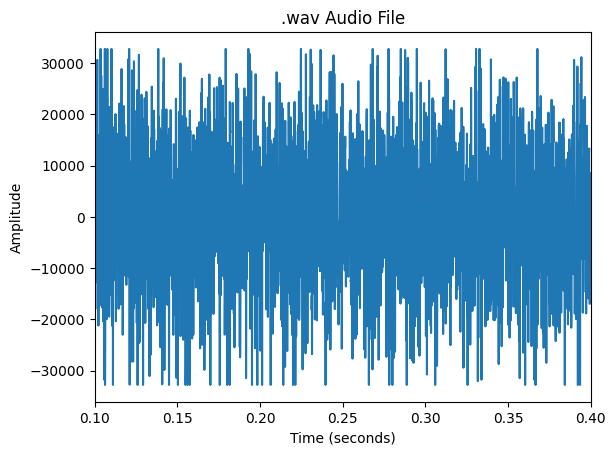

In [5]:
# Plot .wav file
fig, ax = plt.subplots()
fig = plt.plot(signal_df["time (seconds)"], signal_df["amplitude"])
plt.title(".wav Audio File")
ax.set_xlim(signal_df["time (seconds)"][1000], signal_df["time (seconds)"][4000])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

## Power Spectrum

`wavelet_coeffs` is a complex number with a real and an imaginary number (1 + 2i). The power spectrum plots the real component of the complex number. The real component represents the magntiude of the wavelet coefficient displayed as the absolute value of the coefficients squared

Wavelet_coeff is a complex number with a real and an imaginary number (1 + 2i). The power spectrum plots the real component of the complex number

```
import numpy as np
real_component = np.log2(np.square(abs(wavelet_coeffs)))
```

The real component represents the magntiude of the wavelet coefficient

size (39, 60000) with 39 scales and 60000 time steps
x-axis be default is: 60000
y-axis be default is: 39


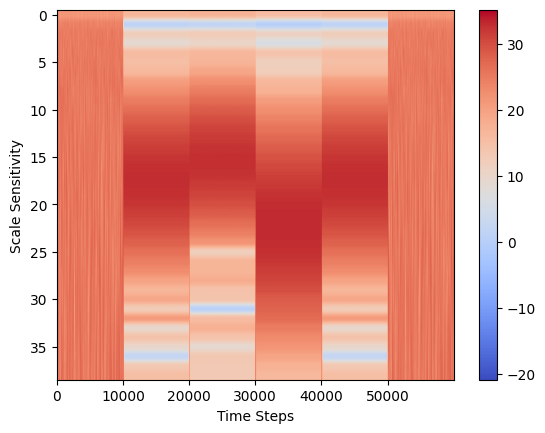

In [6]:
# Amplitude determines the volume of thes ound
# Frequency determines the chord

wavelet_mother = "morl" # morlet

# scale determinse how squished or stretched a wavelet is
scales = np.arange(1, 40)
wavelet_coeffs, freqs = pywt.cwt(signalData, scales, wavelet = wavelet_mother)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")


# Plot scalogram
data = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.show()

(39, 60000)
39
39


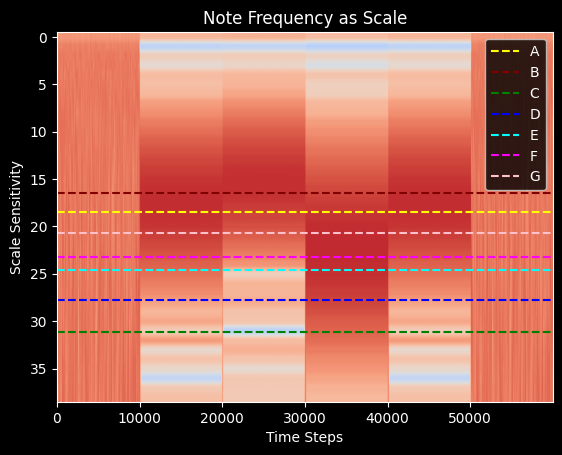

In [10]:
# to convert HZ frequency to a scale = hz *.0001 (where 0.01  # 100 Hz sampling) then frequency2scale
# note frequency in hz
sample_rate = 1/sampleRate
a_freq = pywt.frequency2scale(wavelet_mother, 440*sample_rate)
plt.axhline(y=a_freq, color='yellow', linestyle='--', label='A')
b_freq = pywt.frequency2scale(wavelet_mother, 494*sample_rate)
plt.axhline(y=b_freq, color="maroon", linestyle='--', label='B')
c_freq = pywt.frequency2scale(wavelet_mother, 261*sample_rate)
plt.axhline(y=c_freq, color='green', linestyle='--', label='C')
d_freq = pywt.frequency2scale(wavelet_mother, 293*sample_rate)
plt.axhline(y=d_freq, color='blue', linestyle='--', label='D')
e_freq = pywt.frequency2scale(wavelet_mother, 330*sample_rate)
plt.axhline(y=e_freq, color='cyan', linestyle='--', label='E')
f_freq = pywt.frequency2scale(wavelet_mother, 350*sample_rate)
plt.axhline(y=f_freq, color='fuchsia', linestyle='--', label='F')
g_freq = pywt.frequency2scale(wavelet_mother, 392*sample_rate)
plt.axhline(y=g_freq, color='pink', linestyle='--', label='G')

plt.style.use('dark_background')
power = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
print(power.shape)
print(len(power[:,0]))
print(len(power[:,1]))

plt.title("Note Frequency as Scale")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")
plt.legend()
plt.show()

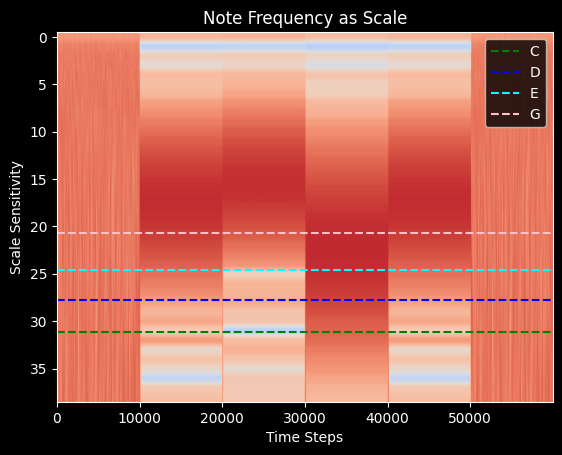

In [9]:
# to convert HZ frequency to a scale = hz *.0001 (where 0.01  # 100 Hz sampling) then frequency2scale
# note frequency in hz
sample_rate = 1/sampleRate
a_freq = pywt.frequency2scale(wavelet_mother, 440*sample_rate)
#plt.axhline(y=a_freq, color='yellow', linestyle='--', label='A')
b_freq = pywt.frequency2scale(wavelet_mother, 494*sample_rate)
#plt.axhline(y=b_freq, color="maroon", linestyle='--', label='B')
c_freq = pywt.frequency2scale(wavelet_mother, 261*sample_rate)
plt.axhline(y=c_freq, color='green', linestyle='--', label='C')
d_freq = pywt.frequency2scale(wavelet_mother, 293*sample_rate)
plt.axhline(y=d_freq, color='blue', linestyle='--', label='D')
e_freq = pywt.frequency2scale(wavelet_mother, 330*sample_rate)
plt.axhline(y=e_freq, color='cyan', linestyle='--', label='E')
f_freq = pywt.frequency2scale(wavelet_mother, 350*sample_rate)
#plt.axhline(y=f_freq, color='fuchsia', linestyle='--', label='F')
g_freq = pywt.frequency2scale(wavelet_mother, 392*sample_rate)
plt.axhline(y=g_freq, color='pink', linestyle='--', label='G')

plt.style.use('dark_background')
data = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.title("Note Frequency as Scale")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(data,
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
ax.set_yticks(freqs)
ax.set_yticklabels(freqs)
plt.legend()
plt.show()

## Last Section

If you're comfortable, and as we briefly used for our embedded logo up top, you can embed raw html into Jupyter Markdown cells (edit to see):

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Your relevant information here!
</div>

Feel free to copy this around and edit or play around with yourself. Some other `admonitions` you can put in:

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We got this done after all!
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Be careful!
</div>

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Scary stuff be here.
</div>

We also suggest checking out Jupyter Book's [brief demonstration](https://jupyterbook.org/content/metadata.html#jupyter-cell-tags) on adding cell tags to your cells in Jupyter Notebook, Lab, or manually. Using these cell tags can allow you to [customize](https://jupyterbook.org/interactive/hiding.html) how your code content is displayed and even [demonstrate errors](https://jupyterbook.org/content/execute.html#dealing-with-code-that-raises-errors) without altogether crashing our loyal army of machines!

---

## Summary
Add one final `---` marking the end of your body of content, and then conclude with a brief single paragraph summarizing at a high level the key pieces that were learned and how they tied to your objectives. Look to reiterate what the most important takeaways were.

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
Finally, be rigorous in your citations and references as necessary. Give credit where credit is due. Also, feel free to link to relevant external material, further reading, documentation, etc. Then you're done! Give yourself a quick review, a high five, and send us a pull request. A few final notes:
 - `Kernel > Restart Kernel and Run All Cells...` to confirm that your notebook will cleanly run from start to finish
 - `Kernel > Restart Kernel and Clear All Outputs...` before committing your notebook, our machines will do the heavy lifting
 - Take credit! Provide author contact information if you'd like; if so, consider adding information here at the bottom of your notebook
 - Give credit! Attribute appropriate authorship for referenced code, information, images, etc.
 - Only include what you're legally allowed: **no copyright infringement or plagiarism**
 
Thank you for your contribution!